In [1]:
import scipy as sp
import numpy as np
import numpy.linalg as la
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def resposta_tempo(x, t, w):

    C=sp.array([[c11/m,0,c12/m,0],[0,c11/m,0,c12/m],[c21/I,0,c22/I,0],[0,c21/I,0,c22/I]])
    G=sp.array([[0,0,0,0],[0,0,0,0],[0,0,0,Ip/I*w],[0,0,-Ip/I*w,0]])
    K=sp.array([[alpha/m,0,gama/m,0],[0,alpha/m,0,gama/m],[gama/I,0,delta/I,0],[0,gama/I,0,delta/I]])
    f=[0,0,0,0,u*w**2*sp.cos(w*t),u*w**2*sp.sin(w*t),(Ip-I)/I*2*w**2*sp.cos(w*t),(Ip-I)/I*2*w**2*sp.sin(w*t)]
    
    a11=np.zeros((4,4))
    a12=np.eye(4)
    a1=np.hstack((a11,a12))
    a2=np.hstack((-1*K,-1*(C+G)))
    
    A=np.vstack((a1, a2))
    
    dxdt=A @ x + f
    
    return dxdt

In [3]:
def campbell(Omega):
    LAMDA=np.zeros((len(Omega),2))
    for i in range(len(Omega)):
        w=Omega[i]
        C=sp.array([[c11/m,0,c12/m,0],[0,c11/m,0,c12/m],[c21/I,0,c22/I,0],[0,c21/I,0,c22/I]])
        G=sp.array([[0,0,0,0],[0,0,0,0],[0,0,0,Ip/I*w],[0,0,-Ip/I*w,0]])
        K=sp.array([[alpha/m,0,gama/m,0],[0,alpha/m,0,gama/m],[gama/I,0,delta/I,0],[0,gama/I,0,delta/I]])

        a11=np.zeros((4,4))
        a12=np.eye(4)
        a1=np.hstack((a11,a12))
        a2=np.hstack((-1*K,-1*(C+G)))

        A=np.vstack((a1, a2))
        w1,v1=la.eig(A)
        imag_part=abs(np.imag(w1))
        LAMDA[i,:]=sp.array([[imag_part[0],imag_part[2]]])
        
    return LAMDA

In [4]:
#propiedades do material (aco)
rho=7860
E=210e9

#dimensoes eixo
L=20
d=.2
A=np.pi*d**2/4

In [19]:
#vetor espaco-estado
x=0
y=0
thetax=0
thetay=0
Dx=0
Dy=0
Dthetax=0
Dthetay=0

z=[x, y, thetax, thetay, Dx, Dy, Dthetax, Dthetay]

#tempo
t0=0
tf=200
t=np.linspace(t0,tf,100*(tf-t0))

In [20]:
#parametros do sistema
m=rho*A*L
I=m*(d**2/16)
I0=np.pi*d**4/64
Ip=m*d**2/8
alpha=12*E*I0/L**3
gama=-6*E*I0/L**2
delta=4*E*I0/L
csi=.2
c11=2*csi*np.sqrt(alpha/m)
c12=2*csi*np.sqrt(abs(gama/m))
c21=c12
c22=2*csi*np.sqrt(delta/I)
u=10

w3 = 298.403586207 rpm


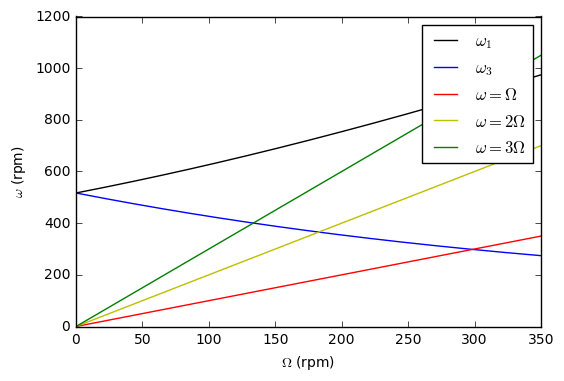

In [21]:
#Campbell

#frequencias naturais
w=np.linspace(0,350,350000)
p=campbell(w)

#determinando as interseçoes
for i in range(len(p[:,0])):
    if abs(p[i,0] - w[i])<1e-2:
        print('w1 =', p[i,0], 'rpm')
    elif abs(p[i,1] - w[i])<1e-3:
            print('w3 =', p[i,1], 'rpm')


# desenhando o diagrama de Campbell
"""
plt.plot(w*30/np.pi, p[:,0]*30/np.pi, 'k-', label='$\omega_1$')
plt.plot(w*30/np.pi, p[:,1]*30/np.pi, 'b-', label='$\omega_3$')
plt.plot(w*30/np.pi, w*30/np.pi,'r-', label='$\omega=\Omega$')
plt.plot(w*30/np.pi, 2*w*30/np.pi,'y-', label='$\omega=2\Omega$')
plt.plot(w*30/np.pi, 3*w*30/np.pi,'g-', label='$\omega=3\Omega$')
"""

plt.plot(w, p[:,0], 'k-', label='$\omega_1$')
plt.plot(w, p[:,1], 'b-', label='$\omega_3$')
plt.plot(w, w,'r-', label='$\omega=\Omega$')
plt.plot(w, 2*w,'y-', label='$\omega=2\Omega$')
plt.plot(w, 3*w,'g-', label='$\omega=3\Omega$')

plt.xlabel('$\Omega$ (rpm)')
plt.ylabel('$\omega$ (rpm)' )
plt.legend()

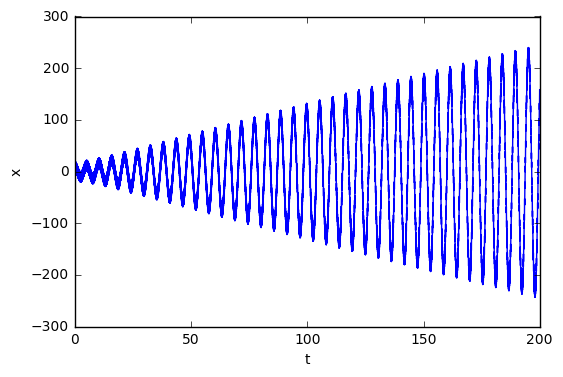

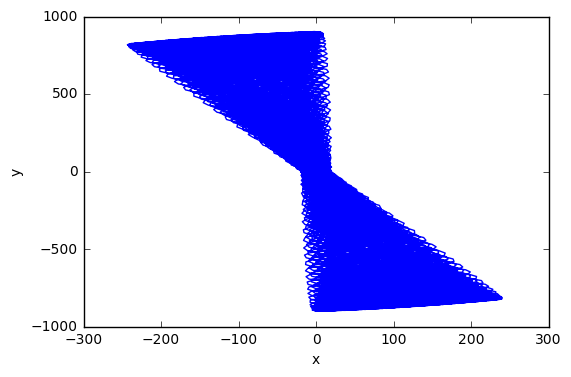

In [22]:
#para frequencia abaixo da natural
w1=100
sol1=odeint(resposta_tempo, z, t, args=(w1,))

plt.plot(t,sol1[:,0])
plt.xlabel('t')
plt.ylabel('x')

plt.figure()
plt.plot(sol1[:,0],sol1[:,1])
plt.xlabel('x')
plt.ylabel('y')

In [19]:
#para frequencia acima da natural
w2=350
sol2=odeint(resposta_tempo, z, t, args=(w2,))

plt.plot(t,sol2[:,0])

KeyboardInterrupt: 